# <span style='color: lightcoral;'>생일 문제(Birthday Problems)</span>

이번 강의에서는 유명한 생일 문제를 시뮬레이션으로 접근해 보겠습니다. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # 그림이 좀 이뻐 보이게

import utils  

# 위젯 기능을 이용하여 그림 그리기
%matplotlib widget   

## <span style='color:blue'>생일 문제 소개</span>

- 학생으로 가득 찬(수는 다를 수 있음) 교실에서 생일이 같은 두 학생이 있을 확률 또는 특정 생일을 가진 학생이 있을 확률을 구하는 문제를 생각해 봅시다. 이와 유사한 상황의 문제를 보통 생일 문제라고 하는데, 이 강의에서는 대표적인 생일 문제 네 가지 형태에 대해 살펴보도록 하겠습니다.


## <span style='color:blue'>자신의 생일과 동일한 생일의 학생이 있으려면 교실에 몇 명이 있어야 할까요? </span>
### <span style='color:blue'>우선, 미리 작성해 놓은 코드를 이용해 실험해 봅시다. </span>

- 우선 특정 생일을 가진 학생이 있으려면 최소 몇 명의 학생이 필요한지 미리 작성해놓은 코드를 이용해 실험적으로 알아봅시다.  
- 다음 셀을 실행시켜 실험하는 방법은 간단합니다. 
 >- 드롭다운에서 생일(연도는 중요하지 않음)을 선택한 다음 `Simulate!` 버튼을 클릭하면, 학생 중 한 명이 당신과 생일이 같을 때까지 랜덤하게 학생을 추가하면서 생일이 같은 학생이 발견될 때까지 몇 명의 학생을 포함시켰는지 그 수를 알려줍니다. <span style='color:orange'> 즉, 최소 학생 수가 확률변수 $X$가 됩니다.</span>  
 >- `Simulate!`를 한 번 누를 때마다 $X$의 값이 왼쪽 그림에 추가로 표시되고, 오른쪽 그림에는 전체 실험 수에 대해 $X$의 결과를 히스토그램으로 표시됩니다. 
 
- 이 실험을 최소 50회 이상 반복한 후, 확률변수 $X$(특정 생일과 같은 학생이 존재하기 위한 학생의 최소 수)가 어떤 분포를 갖는지 오른쪽 그림을 통해 추측해보세요. 

DatePicker(value=None, description='Pick your bday', step=1, style=DescriptionStyle(description_width='initial…

Button(description='Simulate!', style=ButtonStyle())

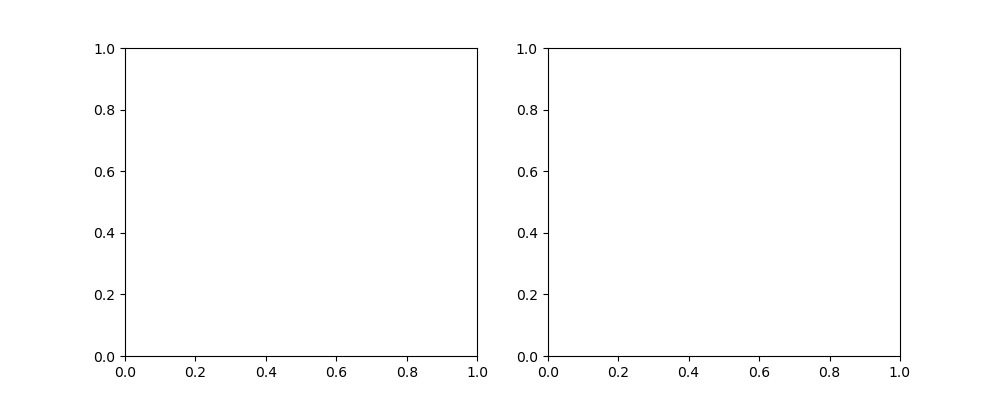

In [2]:
game = utils.your_bday()

## <span style="color:blue"> 생일 문제: 첫 번째 유형</span>

첫 번째 유형의 생일 문제는 특정한 생일이 주어질 때, 생일이 같은 학생이 존재할 확률이 $1/2$ 이상이 되려면 학생의 최소 수는 몇 명인가 하는 문제입니다. 

- 먼저, 이 문제의 답을 구하기 위해 적절한 코드를 작성하여 실험을 통해 접근해보고, 계산을 통해 확인해 보도록 하겠습니다. 
- 실험을 위해 학생 수 `n_students`를 입력으로 주면, 정해진 수만큼 랜덤하게 학생(생일)을 생성하고, 이 중 특정 생일과 일치하는 학생이 있는지를 `True`,`False`로 반환하는 함수 `problem_1`를 작성합니다. 
- `n_students`을 $n$으로 고정하고 (즉, 학생 수를 고정하고) 함수 `problem_1`을 $N$번 반복 실행시킬 때 `True`의 비율을 구하면, $n$명이 있을 때 
생일이 특정 생일과 일치하는 학생이 존재할 확률의 근삿값이 됩니다. 각각의 $n$에 대해 이 확률을 모두 구하면 첫 번째 문제의 답을 실험적으로 유추할 수 있습니다. 

- 우선 (앞으로 소개할 문제를 포함해서) 작성한 코드를 이용하여 실험하기 쉽게, `simulate`함수부터 작성해 두도록 하겠습니다. 
- `simulate` 함수는 다음 세 개의 입력 인자를 받음  
 >- `problem_func`: `problem_1`함수와 같이 입력으로 학생 수를 받을 때, 문제 조건이 성립하는지 여부를 반환하는 함수
 >- `n_students`: 문제를 구현한 함수의 입력으로 전달할 학생 수
 >- `n_simulations`: 정해진 학생 수에 대해 문제의 확률을 실험적으로 구할 때, 반복하는 실험 횟수

In [3]:
def simulate(problem_func, n_students=365, n_simulations=1000):
    
    # 각 시뮬레이션의 결과(`True` 또는 `False`), `True`의 개수를 저장하기 위한 변수 초기화
    matches = 0
    
    # `n_simulations` 번 실험을 반복
    for _ in range(n_simulations):
        
        # 실험 결과 `True`가 반환되면 matches의 1 증가시킴
        if problem_func(n_students):
            matches += 1
    
    # 성공비율 반환 
    return matches/n_simulations

- 이제 앞서 설명한 함수 `problem_1`을 작성 

In [4]:
def problem_1(n_students):
    
    # 특정 생일을 랜덤하게 지정
    predef_bday = np.random.randint(0, 365)
    
    # 입력으로 주어진 학생 수 만큼 생일을 랜던하게 생성 
    gen_bdays = np.random.randint(0, 365, (n_students))
    
    # 특정 생일이 `n_students`명의 학생 중에 있는지 여부를 판단 
    return predef_bday in gen_bdays

- 확률의 근삿값을 좀 더 정확하게 구하기 위해 실험 횟수를 10000으로 두고 실험 (지난 시간에 배운 큰수의 법칙) 
 >- 우선 학생 100명이 있을 때, 특정 생일과 일치하는 학생이 존재할 확률을 먼저 구해보죠.

In [5]:
n = 100 # 학생이 100명 있을 때, 특정 생일을 갖는 학생이 존재할 확률의 근삿값
simulated_prob = simulate(problem_1, n_students=n, n_simulations=10_000)

print(f"{n} 명의 학생이 있을 때, 임의로 정한 날짜가 생일인 학생이 존재할 확률은 {simulated_prob}입니다.")

100 명의 학생이 있을 때, 임의로 정한 날짜가 생일인 학생이 존재할 확률은 0.2359입니다.


- 이제 첫 번째 유형의 생일 문제를 실험적으로 풀려면 각각의 $1\le n\le 1000$에 대해 `simulate`함수를 이용하여 확률의 근삿값을 구해야 합니다. 
 >- 상황을 파악하기 쉽도록 그림으로 나타내 보도록 하죠.  
 >- 아래 함수는 `plot_simulated_probs`는 문제마다 그림 그리는 코드를 반복하지 않기 위해 작성한 함수입니다. 

In [6]:
def plot_simulated_probs(sim_probs, class_size, prob=0.5):
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    sns.scatterplot(x=class_size, y=sim_probs, ax=ax, label="simulated probabilities")
    ax.set_ylabel("Simulated Probability")
    ax.set_xlabel("Classroom Size")
    ax.set_title("Probability vs Number of Students")
    ax.plot([0, max(class_size)], [prob, prob], color='red', label=f"p = {prob}")
    ax.legend()
    plt.show()

In [7]:
big_sizes = [*range(1,1000, 5)] # 대략적인 범위를 빨리 파악하기 위해 1부터 5간격으로 학생 수 설정

# 학생 수마다 확률의 근삿값 계산 (답이 포함되는 범위를 파악하기 위해 `n_simulations=1000`으로 실행. 실행시킬 때 마다 결과가 달라짐)
simulated_probs_1 = [simulate(problem_1, n_students=n) for n in big_sizes]

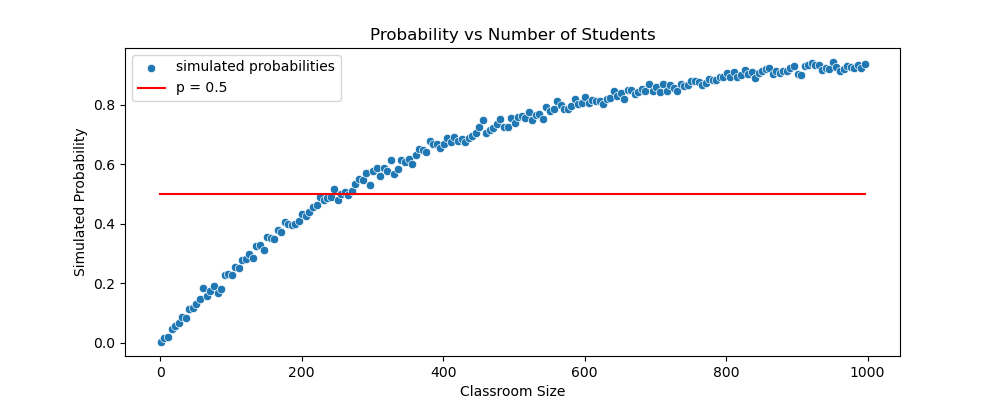

In [8]:
# 계산 결과를 그래프로 시각화하기 
plot_simulated_probs(simulated_probs_1, big_sizes,prob=0.5)

- 이 실험에서 얻은 $n$의 값을 확인해보자. (`simulated_probs_1`은 랜덤함수를 이용하여 실험하므로 새로 구할 때마다 답이 달라짐에 유의)

In [9]:
quess_1 = np.array(simulated_probs_1) >= 0.5
big_sizes[np.argmax(quess_1)]

246

- 첫 번째 문제의 답이 대략 $250\sim 260$사이로 추정되므로(실험 횟수를 기본 설정값 1000으로 구한 결과임), 이 사이의 $n$ 각각에 대해 실험 횟수를 좀 더 크게(`n_simulations=200_000`) 하고 실험을 반복해보자. 

In [10]:
class_size = range(250,261)
refined_probs1 = [simulate(problem_1, n_students=n, n_simulations=200_000) for n in class_size] #실행 시간 2분 이내

In [11]:
simulated_sol_1 = np.array(refined_probs1) >= 0.5
class_size[np.argmax(simulated_sol_1)]   #np.argmax: 최댓값을 갖는 첫 번째 인덱스 반환

253

- <span style='color:orange'> 따라서, 첫 번째 문제의 답은 $253$이라고 예측할 수 있다. </span>

## <span style = 'color:blue'>생일 문제 첫 번째 유형에 대한 이론적 풀이와 답 </span>

$1$년은 $365$일이라 가정하고, $n$명의 학생 중에서 특정 날짜가 생일인 학생이 적어도 한 명 있을 확률을 $p(n)$이라 하죠. 이때, 구하는 답은 $p(n) \geq 0.5$을 만족하는 $n$의 최솟값입니다.

$$ $$

특정 날짜를 $d$라 하고, $n$명의 학생은 랜덤하게 구성된다고 생각해도 됩니다. 

 $i$번째 학생의 생일이 $d$일인 사건을 $S_i$라 하면 $P(S_i) = \frac{1}{365}$이므로, 이 학생의 생일이 $d$일이 아닐 확률은 $P(S_i^c) = 1 - P(S_i) = 1 - \frac{1}{365} $입니다. 이 확률은 모든 학생에게 동일하고, 각 학생의 생일은 서로 독립적이라고 가정할 수 있습니다. 
 
이제 적어도 한 명의 생일이 $d$일인 사건을 $\mathcal{S}$라 하죠. 

$d$일이 생일인 학생이 없을 확률은 $P(\mathcal{S}^c)=P(S_1^c \cap S_2^c \cap \ldots \cap S_k^c)$이므로, 각 사건 $S_i$가 독립이라는 것을 이용하면 다음과 같이 계산할 수 있습니다. 
$$
\begin{equation}
\begin{split}
P(\mathcal{S}) {} & = 1 - P(\mathcal{S}^c) \\
              & = 1 - P(S_1^c \cap S_2^c \cap \ldots \cap S_k^c) \\
              & = 1 - P(S_1^c)P(S_2^c) \cdots P(S_k^c) \\
              & = 1 - \left(1 - \frac{1}{365}\right)^n.
\end{split}
\end{equation}
$$


따라서, 학생의 수가 $n$명일 때 특정 날짜가 생일인 학생이 있을 확률은 
$$p(n)=P(\mathcal{S}) = 1 - \left(1 - \frac{1}{365}\right)^n$$
이고, 문제의 답은 $p(n) \geq \frac{1}{2}$을 만족하는 최솟값 $n$을 구하면 됩니다. 


\begin{align}
 1 - \left(1 - \frac{1}{365}\right)^n &\geq \frac{1}{2} \\
\left(1 - \frac{1}{365}\right)^n &\leq \frac{1}{2}\\
n\ge \dfrac{-\ln{2}}{\ln{\left(\frac{364}{365}\right)}}\approx  252.65\\
\end{align}

(아래 셀에서처럼 계산하면)
$n \geq 252.65$를 만족하는 자연수 $n$의 최솟값은 253이다. 

<span style='color:orange'>따라서, 실험을 통해 구한 답이랑 같음을 알 수 있다.</span> 

In [12]:
-np.log(2)/np.log(364/365)

252.6519888441586

## <span style="color:blue"> 생일 문제: 두 번째 유형</span>

두 번째 문제는 첫 번째 문제와 매우 유사합니다. 유일한 차이점은 특정 날짜가 랜덤하게 정해진 것이 아니라,  교실에 있는 학생 중 어느 한 학생의 생일로 바뀌는 것입니다. 즉, $n$명의 학생이 있는 교실에서 임의로 학생을 뽑을 때, 이 학생의 생일이 교실의 다른 학생과 일치할 확률이 0.5 이상이 되도록 하는 $n$의 최솟값을 구하는 것이 두 번째 문제입니다. 

<span style='color:orange'> 이미 눈치챘겠지만, 이 문제의 답은 $254$입니다. </span>

$n$명 중 랜덤하게 뽑은 한 명의 생일이 첫 번째 문제의 특정 날짜에 해당하므로, $n-1$명에 대해 첫 번째 문제를 푸는 것과 같아집니다. 

첫 번째 문제처럼 실험을 통해 이 문제의 답을 구할 수 있도록, `simulate`함수의 입력으로 전달할 함수 `problem_2`를 작성해 보겠습니다. 
(`problem_1` 함수의 구현과 달라지는 점을 생각해보세요.)

In [13]:
def problem_2(n_students):
    
    # 모든 학생의 생일을 랜덤하게 생성
    gen_bdays = np.random.randint(0, 365, (n_students))
    
    # 학생 한 명을 랜덤하게 뽑기
    rnd_index = np.random.randint(0, len(gen_bdays))
    
    # 뽑힌 학생의 생일 확인 
    rnd_bday = gen_bdays[rnd_index]
    
    # 나머지 학생들의 생일
    remaining_bdays = np.delete(gen_bdays, rnd_index, axis=0)
    
    # 나머지 학생들 중 뽑힌 학생과 생일이 일치하는 학생이 있는지 여부를 반환
    return rnd_bday in remaining_bdays

- 첫 번째 문제와 유사한 상황은 생략하고, $250$명과 $260$명 사이의 학생에 대해 확률 $p(n)$계산  

 >- `n_simulations=200_000`으로 확률의 근삿값 계산 

In [14]:
class_size = range(250,261)
refined_probs2 = [simulate(problem_2, n_students=n, n_simulations=200_000) for n in class_size] #실행 시간 2분 이내

In [15]:
simulated_sol_2 = np.array(refined_probs2) >= 0.5
class_size[np.argmax(simulated_sol_2)]

254

- <span style='color:orange'> 실험을 통해 구한 두 번째 문제의 답도 $254$입니다. </span>

## <span style="color:blue"> 생일 문제: 세 번째 유형</span>

많은 사람들이 생일 문제라고 부르는 문제가 이번에 소개할 다음 문제입니다. 

**세 번째 문제** : $n$명의 학생 중 생일이 같은 두 학생이 있을 확률이 $0.5$ 이상이 되려면 $n$의 최솟값은?


이 문제의 답을 예상할 수 있나요? 아래 셀을 실행시켜 작성해 둔 실험을 하면서 예상이 맞는지 확인해 보세요. 

**실험 방법** :

- 모든 기록을 지우고 실험을 새로 시작하려면 아래 셀을 다시 실행시키세요. 

- 새로운 실행을 시작하려면 위쪽 패널(처음에 흰색 부분)의 아무 곳이나 클릭하세요('Figure'가 표시되는 바로 아래 부분).  

- 상단 패널에는 랜덤하게 생성된 생일이 표시되며 두 학생의 생일이 일치하는 경우 알려줍니다.   

- 아래쪽 패널의 왼쪽은 매 실행마다 일치하는 데 필요한 학생 수를 표시합니다.   

- 아래쪽 패널 오른쪽에는 히스토그램과 동일한 정보가 표시됩니다.  

- **적어도 50회 이상 실행을 반복하면서 이 문제의 답을 유추해보세요**

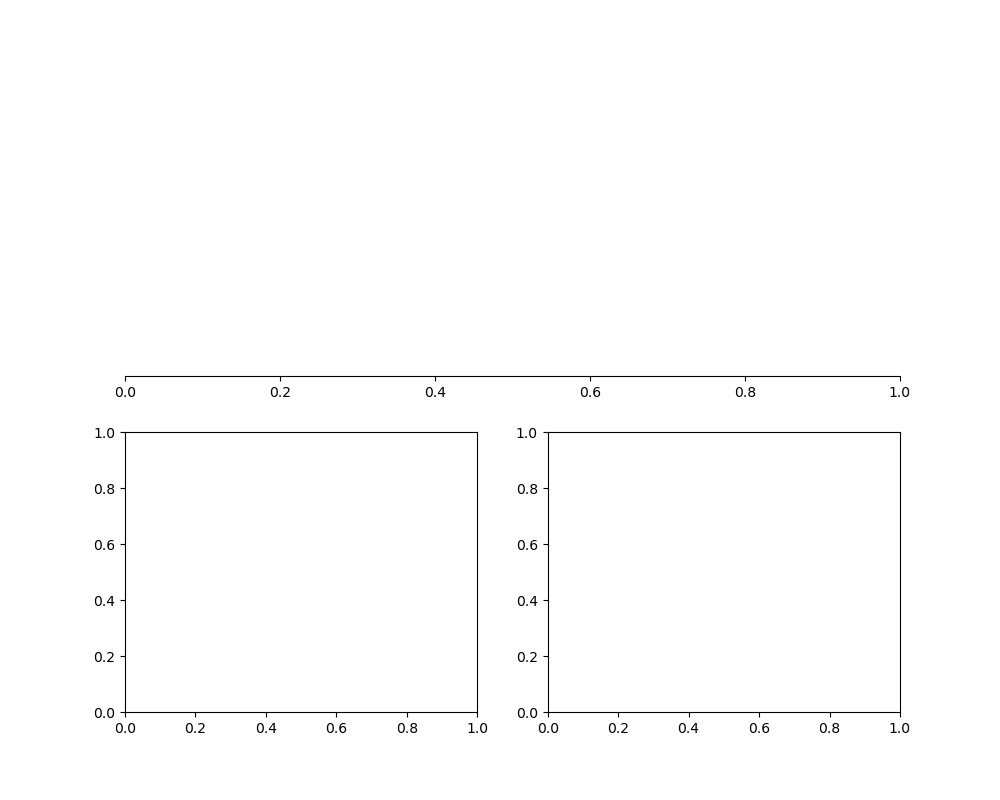

In [16]:
game_third_prob = utils.third_bday_problem()

- 이제 이 문제의 답이 어떤 범위에 있을지 $n$에 대한 분포를 보고 감을 잡았나요?  
 >- 아마도 $20$에서 $30$사이에 있을 가능성이 높아 보입니다.  
 >- 실제로 실험을 통해 이 문제를 푼다면 첫 번째, 두 번째 문제에서처럼 좀 더 넓은 범위의 $n$에 대해 확률의 근삿값을 대략적으로 구하고, 가능성이 높은 범위에 대해 좀 더 정밀한 확률의 근삿값으로 접근하겠지만, 이 번에는 $n$의 범위를 $20$에서 $30$사이로 좁힌 상태에서 확률의 근삿값을 정밀하게 구하겠습니다. 
 
- 우선, $n$이 주어질 때 생일이 일치하는 두 학생이 있는지를 판단하는 `problem_3` 함수부터 작성해보죠.

In [17]:
def problem_3(n_students):
    
    # 모든 학생의 생일을 생성
    gen_bdays = np.random.randint(0, 365, (n_students))
    
    # `set`을 이용하여 생일의 집합(중복되는 값 제거)을 구합니다. 
    unique_bdays = np.array(list(set(gen_bdays)))
    
    # 원래 생일 배열과 집합의 크기가 다르다면 중복되는 생일이 있다는 말이겠죠.
    return len(unique_bdays) != len(gen_bdays)

- 이제 문제의 답을 구해보죠.

In [18]:
class_size3 = range(20,30)
refined_probs3 = [simulate(problem_3, n_students=n, n_simulations=200_000) for n in class_size3] #실행 시간 2분 이내

In [19]:
simulated_sol_3 = np.array(refined_probs3) >= 0.5
class_size3[np.argmax(simulated_sol_3)]

23

In [20]:
refined_probs3

[0.411485,
 0.445815,
 0.476965,
 0.50706,
 0.53825,
 0.56739,
 0.5995,
 0.627635,
 0.65551,
 0.68173]

- <span style='color:orange'> 실험 결과로 얻은 세 번째 문제의 답은 $23$입니다. </span>

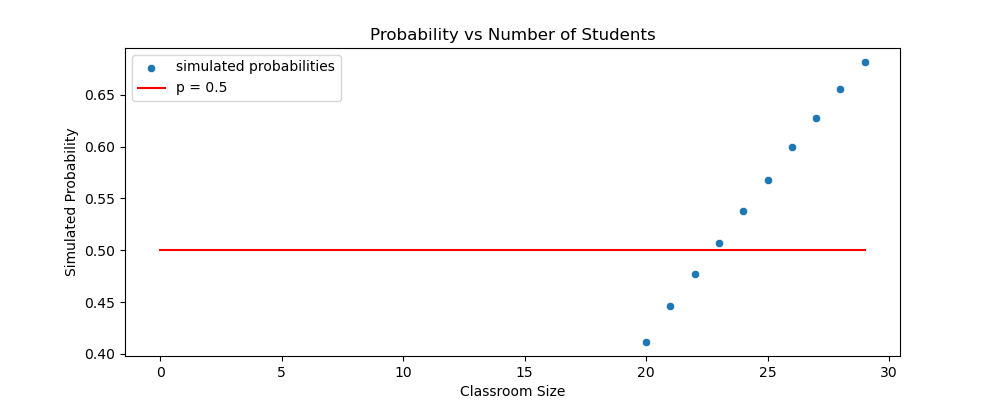

In [30]:
# 세 번째 실험 결과를 그래프로 그려보면 다음과 같습니다. 

utils.plot_simulated_probs(refined_probs3, class_size3)

## <span style = 'color:blue'>생일 문제 세 번째 유형에 대한 이론적 풀이와 답 </span>

이 문제는 여사건의 확률을 이용하면 쉽게 구할 수 있습니다. $n$명의 학생 중 생일이 겹치는 학생이 없을 확률 $q(n)$, $n$명의 학생 중 생일이 겹치는 학생이 있을 확률을 $p(n)$이라 하면 $p(n)=1-q(n)$이 성립합니다. 따라서, $q(n)$을 구하면 충분합니다. 

학생에게 $1$부터 $n$까지의 번호가 하나씩 배정되어 있다고 생각하고, $i$번 학생이 이전 번호의 학생과 생일이 다를 확률로 $q_i$라 두겠습니다. 
예를 들어, $1$번 학생보다 앞 번호의 학생은 없으므로 $q_1=1$, $q_2= \frac{364}{655}$, $\cdots$와 같이 귀납적으로 구해나가면 

$$q_k = \frac{365 - (k-1)}{365}\ (1\le k \le n)$$

이 됩니다. 또 각 학생의 생일은 서로 독립적이므로  선택한다고 가정할 수 있으므로 $q(n)$은 모든 $q_k \ (1\le k\le n)$의 곱이 되고, 다음 식과 같습니다. 

$$
\begin{aligned}
q(n) =&q_1 \cdot q_2 \cdot \ldots \cdot q_{n-1} \cdot q_n\\
&\\
=&1 \cdot \frac{364}{365} \cdot \frac{363}{365} \cdot \ldots \cdot \frac{365 - (n-2)}{365} \cdot \frac{365 - (n-1)}{365}\\
&\\
=&\left(1-\dfrac 1{365}\right)\left(1-\dfrac 2{365}\right)\left(1-\dfrac {n-1}{365}\right)
\end{aligned}.$$
$$ $$
따라서, 세 번째 문제의 답은 $p(n)\ge \frac 1 2 \Longleftrightarrow q(n)\le \frac 1 2$를 만족하는 최소의 자연수 $n$을 구하면 됩니다. 

이 부등식을 대수적으로 푸는 것은 어려운 일이므로 적절한 근사식과 근삿값을 이용하여 답을 구해 보겠습니다. 

우선 ($1$을 제외한) $(n-1)$개의 각 항은 모두 $1$보다 작고, $n>365$이면 비둘기 집 원리에 의해 반드시 생일이 겹치는 학생들이 있으므로 $q(n)=0$이 됩니다. 따라서 $1<n\le 365$인 $n$에 대해 
$q(n+1)<q(n)$이 성립합니다. 


- $q(n)$이 감소한다는 사실을 확인하고 나면, $q(n)\le \frac 1 2$를 만족하는 자연수 $n$의 최솟값은 간단한 파이썬 코드를 이용해 구할 수 있습니다. 
(이것이 <span style='color:orange'>첫 번째 방법</span>입니다.) 
 > 일반적으로 주어진 확률 `prob`에 대해 $q(n) \le $ `prob`를 만족하는 자연수 $n$의 최솟값을 반환하는 함수를 작성해보죠.


In [26]:
# 주어진 확률 `prob`에 대해 q(n) <= prob를 만족하는 `n`의 최솟값을 반환하는 함수 
def find_q(prob):
    q = 1
    i = 0
    while q > prob:
        q = q*(1-i/365)   # q(n)식을 잘 보고, 코드의 이 줄과 아랫줄의 순서를  
        i = i+1           # 잘 고민하고 확인할 필요가 있습니다. 
    return i

In [27]:
find_q(0.5)

23


- $q(n)$이 감소한다는 사실과 $q(n)\le \frac 12$을 만족하는 $n$의 최솟값이 답이라는 사실로부터 파이썬 코드를 활용하면 정확한 답 구했습니다.  
 > 앞에서 실험을 통해 구한 $23$이 올바르게 구한 답이라는 것도 확인됐죠! 


- 이번엔 좀 더 이론적으로 근사시켜 답을 구하는 <span style='color:orange'>두 번째 방법</span>을 알아보죠. 
 > $q(n)$의 각 항은 $0$과 $1$사이의 작은 값이고, 그 형태가 $0$과 $1$사이의 $x$에 대해 $(1-x)$꼴입니다.  
 $$ $$
 > 지수함수의 테일러 1차 근사 다항식을 이용하면 $0\le x \le 1$에서 $e^{-x} \approx 1-x$임을 알고 있습니다. 
 > 실제로 미분을 이용하면 함수 $f(x)= 1-x-e^{-x}$가 $0\le x \le 1$에서 감소함수이므로, 
 $$ $$
 $0\le x\le 1$에서 두 함수 $(1-x)$와 $e^{-x}$의 오차가 가장 커지는 것은 $x=1$일 때이며, 이 경우에도 오차가 $0.368$을 넘지 않습니다.  
 > 특히, $n\le 40$ 즉, $x\le \frac{40}{365}$일 때는 두 함수의 오차가 $0.02$보다 작습니다.)  
$$ $$
 > 따라서, 이 근사식을 이용하면 
 $$q(n) \approx e^{-\frac{1}{365}} \cdot e^{-\frac{2}{365}} \cdot \ldots \cdot e^{-\frac{n-2}{365}} \cdot e^{-\frac{n-1}{365}} = e^{- \frac{1 + 2 + \ldots + (n-1)}{365}}=e^{-\frac{n(n-1)}{730}}$$
과 같이 $q(n)$을 근사시킬 수 있습니다. 따라서 $q(n)\le \frac 1 2$를 근사적으로 풀면 
$$ $$
$$\frac{n(n-1)}{730} \geq \ln 2\Longleftrightarrow n(n-1) \geq 730 \cdot \ln 2$$
이고 $\ln 2 \approx 0.6931$이므로 
$$n(n-1) \geq 505.96 \geq 505$$
를 만족하는 최소의 자연수 $n$을 구하면 됩니다. 
$$ $$
 > $n$의 값에 따라 $n(n-1)$을 구하면 아래표와 같으므로 $n=23$이 답이 됨을 알 수 있습니다. 
 |$n$| $22$|$23$|$24$|
 |:---|:---:|:---:|:---:|
 |$n(n-1)$|$462$|$506$|$552$|


- 위 풀이에서 사용했던, 두 함수 $f(x)=1-x$와 $g(x)=e^{-x}$의 오차를 그래프로 확인해 봅시다. 

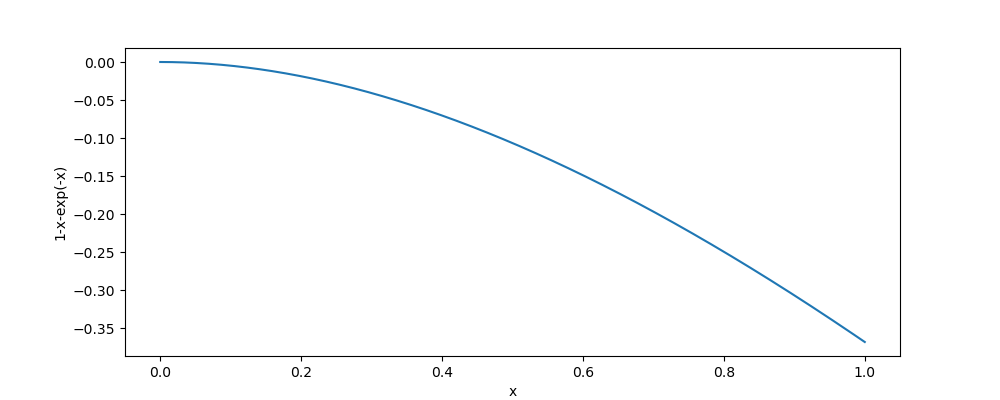

In [42]:
my_error=lambda x: 1-x-np.exp(-x)

xlist = np.linspace(0,1,1000)
fig, ax = plt.subplots(1,1,figsize=(10,4))
ax.set_ylabel("1-x-exp(-x)")
ax.set_xlabel("x")
ax.plot(xlist, my_error(xlist))
plt.show()

## <span style="color:blue"> 생일 문제: 네 번째 유형</span>

이제 생일 문제와 관련된 네 번째이자 마지막 문제입니다. 이 문제는 개수가 같은 두 개의 목록이 있을 때, 한 목록의 항목과 다른 목록의 항목 간에 일치하는 항목을 찾는 상황과 관련이 있습니다. 앞의 문제들처럼 교실의 학생으로 문제를 서술하면 다음과 같습니다.

- $n$명의 학생이 있는 두 개의 교실 A, B가 있다. 생일이 일치하는 A교실의 학생과 B교실의 학생이 존재할 확률이 0.5이상이 되도록 하는 자연수 $n$의 최솟값은?


우선 실험으로 답을 찾기 위해 `problem_4` 함수부터 작성해 보겠습니다. 
 > `np.isin` 함수를 활용해보죠. 기본적으로 첫 번째 입력 인자는 값, 두 번째 입력 인자는 값들의 배열 형태로 많이 쓰지만, 첫 번째 입력 인자도 배열로 주어지면 브로드캐스팅이 일어납니다. 다음 예를 확인하세요. 

In [32]:
np.isin(3,[2,3,4,5])

array(True)

In [33]:
np.isin([2,3,1,5,4,6],[2,3,4,5])

array([ True,  True, False,  True,  True, False])

In [34]:
def problem_4(n_students):
    
    # A 교실 학생의 생일을 랜덤하게 생성
    gen_bdays_A = np.random.randint(0, 365, (n_students))
    
    # B 교실 학생의 생일을 랜덤하게 생성
    gen_bdays_B = np.random.randint(0, 365, (n_students))
    
    # 두 교실 학생의 생일이 겹치는 것이 한 쌍이라도 있는지 확인 
    return np.isin(gen_bdays_A, gen_bdays_B).any()    # 이 부분을 set을 바꾸어 확인하는 것도 가능하지만, `np.isin`을 이용

- 이제 답이 포함되는 범위를 빠르게 탐색하기 위해, 다음과 같은 설정으로 `simulate` 함수를 이용하여 확률의 근삿값을 계산합니다. 
 >- `n_simulations`를 기본값 $1000$으로 그대로 두고
 >- $1\le n< 80$ 범위의 각 $n$  

In [35]:
small_sizes = [*range(1, 80)]
simulated_probs_4 = [simulate(problem_4, n_students=n) for n in small_sizes]

- 범위를 세분하고, `n_simulations`를 충분히 큰 값 $200000$으로 보다 정밀한 확률의 근삿값을 구하기 전에 시각적으로 범위를 찾아보죠.
 > 아래 셀을 실행시키면 $10\le n\le 20$에 대해 조사하면 충분할 것으로 보입니다. 

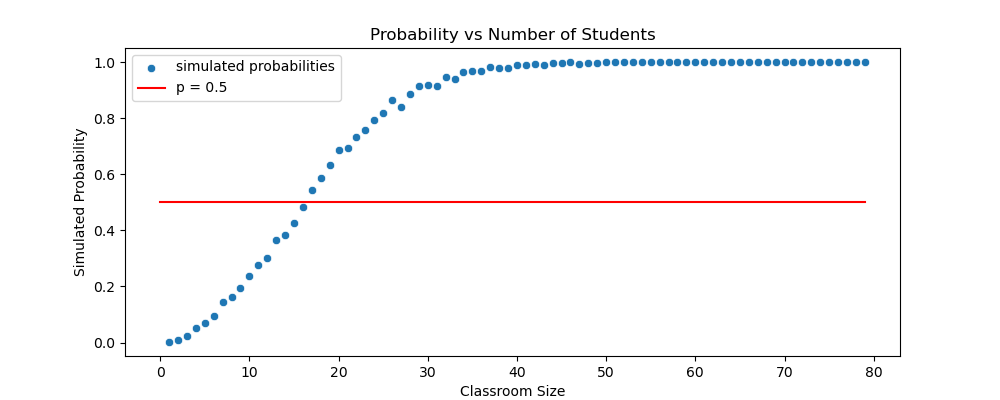

In [41]:
utils.plot_simulated_probs(simulated_probs_4, small_sizes)

- 이제 답을 포함하는 것으로 보이는 좁은 범위에 집중해서, 설정값 `n_simulations=200_000`으로 정밀한 확률의 근삿값을 구하고 네 번째 문제의 답을 구해보죠. (`np.isin`을 계산하는 부분이 앞 문제 함수보다 계산량이 많음을 확인하고 그 이유를 생각해 보세요!)

In [37]:
# 3분 정도 걸리는 시간이 참기 힘들면, `n_simulations=200_000`을 `n_simulations=100_000`로 실습

class_size4 = range(10,20)
refined_probs4 = [simulate(problem_4, n_students=n, n_simulations=200_000) for n in class_size4] #2분 이내 계산됨

In [38]:
simulated_sol_4 = np.array(refined_probs4) >= 0.5
class_size4[np.argmax(simulated_sol_4)]

16

- <span style='color:orange'> 실험 결과로 얻은 네 번째 문제의 답은 $16$입니다. </span> 

- 이제 이론적으로 계산해서 구한 답이 맞는지 확인해보죠.

## <span style = 'color:blue'>생일 문제 네 번째 유형에 대한 이론적 풀이와 답 </span>

이 문제에 대한 해결책은 첫 번째 문제와 유사합니다. 다만 차이점은 특정 날짜 $d$대신에 A 교실에 있는 $n$명의 학생 생일을 각각 $d$로 생각하고, 확률을 계산하는 것입니다. A교실의 $i$번째 학생의 생일이 B교실의 어떤 학생과도 일치하지 않는 사건을 $Q_i$, 그 확률을 $q_i$라고 하면 첫 번째 문제 풀이에 의해 
$$q_i = \left(1 - \frac{1}{365} \right)^n\ (1\le i \le n)$$
입니다. 또, 학생들의 독립적인 표본을 가정하고 있으므로 사건 $Q_1,\cdots,Q_n$은 서로 독립입니다. 
따라서, A교실의 학생과 B교실의 학생의 생일이 일치하는 경우가 없을 확률을 $q(n)$이라 하면  
$$q(n)=q_1\cdot \ldots \cdot q_n=\left(1 - \frac{1}{365} \right)^n\cdot \ldots \cdot \left(1 - \frac{1}{365} \right)^n=
\left(1 - \frac{1}{365} \right)^{n^2}
$$
이 됩니다. 


문제의 답은 $1-q(n)\ge 0.5 \Longleftrightarrow q(n)\le 0.5$를 만족하는 $n$의 최솟값을 구하면 됩니다. 

이제, $\frac1{365}$는 충분히 작은 값이므로 앞의 문제를 풀 때처럼 $1 - x \approx e^{-x}$로 근사시키면 

$$q(n) \approx e^{-\frac{n^2}{365}}$$
이고 

$$e^{-\frac{n^2}{365}}\le \frac 1 2\ \Longleftrightarrow\ n^2\ge 365\ln2\ \Longleftrightarrow\ n\ge \sqrt{365\ln2}\approx 15.906$$ 
에서 $n=16$이 구하는 답임을 알 수 있습니다. 

#### <span style = 'color:lightcoral'> 주의 사항 </span>
    
- 이 강의에서는 네 가지 유형의 문제 모두 확률이 0.5이상이 될 조건에서 코드를 작성하고 문제를 풀었지만, 코드를 `simulate`함수의 옵션 `prob`을 0.5가 아닌 다른 값으로 설정하면 작성한 코드 수정없이 다른 문제도 동일하게 실험적으로 답을 구할 수 있습니다. 

- <span style='color:orange'>주어진 문제를 (컴퓨터를 이용한) 실험으로 해결하기 위해  이 강의에서 접근한 방식을 다시 한 번 곰곰히 생각해보세요</span>